# House Sales in King County, USA
----

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**id** :a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms/House

**bathrooms**: Number of bathrooms/bedrooms

**sqft_living**: square footage of the home

**sqft_lot**: square footage of the lot

**floors** :Total floors (levels) in house

**waterfront** :House which has a view to a waterfront

**view**: Has been viewed

**condition** :How good the condition is Overall

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_above** :square footage of house apart from basement

**sqft_basement**: square footage of the basement

**yr_built** :Built Year

**yr_renovated** :Year when house was renovated

**zipcode**:zip code

**lat**: Latitude coordinate

**long**: Longitude coordinate

**sqft_living15** :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15** :lotSize area in 2015(implies-- some renovations)

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import gmaps
import os

# Importing Data

- Load and read csv file

In [2]:
# File to Load:
file_to_load='kc_house_data.csv' 

# Read kc_house_data csv file and store into data frame:
kc_house_data_df=pd.read_csv(file_to_load)
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Slicing Data
- Only display in dataframe columns: 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'yr_built', 'zipcode', 'lat', 'long'

In [3]:
# Columns to display
house_data_df = kc_house_data_df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
                                  'waterfront', 'yr_built', 'zipcode', 'lat', 'long']]

# Formatting
#house_data_df.style.format({"price": "${:,.2f}", "bathrooms":"{:.2f}"})

house_data_df.head()



,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
0,7129300520,221900.0,3,1.00,1180,0,1955,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,0,1951,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,0,1933,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,0,1965,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,0,1987,98074,47.6168,-122.045


# Statiscal Summary
- Obtain statiscal summary of dataframe

In [4]:
house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,waterfront,yr_built,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,0.007542,1971.005136,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.086517,29.373411,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.000000,2015.000000,98199.000000,47.777600,-121.315000


In [5]:
house_data_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
waterfront       int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
dtype: object

# 1. What’s the average amount of bedrooms and bathrooms in a house and is the price higher when the house has more bedrooms or bathrooms?

In [6]:
# Calculate average amount of bedrooms
avg_bedroom = house_data_df['bedrooms'].mean()
print(f" The average amount of bedrooms in a house is {round(avg_bedroom,0)}")


# Calculate average amount of bathrooms
avg_bathroom = house_data_df['bathrooms'].mean()
print(f" The average amount of bathrooms in a house is {round(avg_bathroom,2)}")

 The average amount of bedrooms in a house is 3.0
 The average amount of bathrooms in a house is 2.11


Scatter plots with linear regression and r-squared value (bedrooms vs. price and bathrooms vs. price) 

The r-squared is: 0.30833836868809666


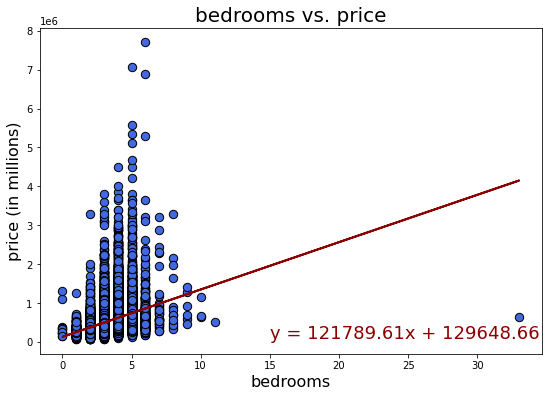

In [7]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['bedrooms']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('bedrooms vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('bedrooms', fontsize=16, color='black')
plt.annotate(line_eq,(15,8.000000e+04), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Price.png')

# Show plot:
plt.show()

The r-squared is: 0.5251340727456004


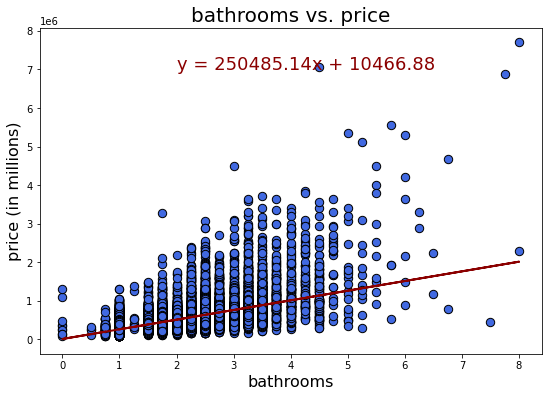

In [8]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = house_data_df['bathrooms']
y_values = house_data_df['price']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('bathrooms vs. price', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.xlabel('bathrooms', fontsize=16, color='black')
plt.annotate(line_eq,(2,7.000000e+06), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bathrooms vs. Price.png')

# Show plot:
plt.show()

# 2. What’s the correlation between sqft_living and pricing and do larger sqft_living greater than 6,000 sqft with a waterfront view cost more or less than those without a waterfront view?

Scatter plot with linear regression and r-squared value (sqft_living vs. price)

Dataframe for larger sqft_living greater than 6,000 sqft with waterfront view and without waterfront view price columns

Scatter plots with linear regression and r-squared value (larger sqft_living greater than 6,000 sqft with waterfront view and without waterfront view vs. price)

# 3. Are house sale prices higher in higher income neighborhoods?

Scatter plot with linear regression and r-squared value (zipcode vs. price) 

Dataframe for 10 most expensive houses by neighborhood zipcode include lat, lng, House ID, Price, and zipcode columns

Plot markers for top 10 most expensive houses by neighborhood zipcode or lat and lng on a map with pins containing House ID, Price, and zipcode

# 4. Do houses with a waterfront view or without a waterfront view have more price outliers?

Waterfront vs. Non_waterfront house prices analysis using pie and bar chart 

In [9]:
# Non_waterfront only
non_wf=house_data_df.loc[house_data_df["waterfront"]==0]
non_wf
non_wf.count()["id"]


21450

In [10]:
# waterfront properties only
wf=house_data_df.loc[house_data_df["waterfront"]==1]
wf
wf.count()["id"]

163

Pie chart to show waterfront vs non-waterfront properties

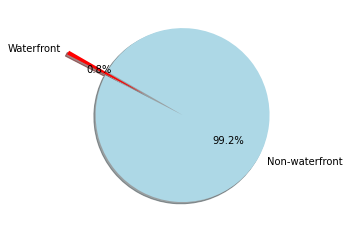

In [11]:
labels = ["Waterfront", "Non-waterfront"]

# The values of each section of the pie chart - from waterfront and non waterfront properties count
sizes = [163, 21450]

# The colors of each section of the pie chart
colors = ["red", "lightblue"]


explode = (0.5, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.savefig('output_data/ waterfront vs nonwaterfront piechart.png')
plt.show()

In [12]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_label=["<1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000",">6000"]
pd.cut(wf["sqft_living"], bins, labels=group_label).head()

49     2000-3000
230    1000-2000
246    3000-4000
264        <1000
300    4000-5000
Name: sqft_living, dtype: category
Categories (7, object): ['<1000' < '1000-2000' < '2000-3000' < '3000-4000' < '4000-5000' < '5000-6000' < '>6000']

In [13]:
wf["living_sqft_range"]=pd.cut(wf["sqft_living"], bins, labels=group_label)
wfrange=wf.groupby(["living_sqft_range"])
wfrange_df=wfrange['price','bedrooms','bathrooms'].median()
print(wfrange_df)

                       price  bedrooms  bathrooms
living_sqft_range                                
<1000               528000.0       2.0       0.75
1000-2000           656500.0       2.0       1.75
2000-3000          1190000.0       3.0       2.50
3000-4000          1925000.0       3.0       2.75
4000-5000          2700000.0       4.0       3.75
5000-6000          2560000.0       4.0       3.50
>6000              3290000.0       4.5       4.00


/var/folders/53/8v7yl9_11zqgtgh__mhvy_5w0000gn/T/ipykernel_9483/1552949952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf["living_sqft_range"]=pd.cut(wf["sqft_living"], bins, labels=group_label)
/var/folders/53/8v7yl9_11zqgtgh__mhvy_5w0000gn/T/ipykernel_9483/1552949952.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wfrange_df=wfrange['price','bedrooms','bathrooms'].median()


In [14]:
bins = [0,1000,2000,3000,4000,5000,6000,7000]
group_label=["<1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000",">6000"]
pd.cut(non_wf["sqft_living"], bins, labels=group_label).head()

0    1000-2000
1    2000-3000
2        <1000
3    1000-2000
4    1000-2000
Name: sqft_living, dtype: category
Categories (7, object): ['<1000' < '1000-2000' < '2000-3000' < '3000-4000' < '4000-5000' < '5000-6000' < '>6000']

In [15]:
non_wf["living_sqft_range"]=pd.cut(non_wf["sqft_living"], bins, labels=group_label)
non_wfrange=non_wf.groupby(["living_sqft_range"])
non_wfrange_df=non_wfrange['price','bedrooms','bathrooms'].median()
print(non_wfrange_df)

                       price  bedrooms  bathrooms
living_sqft_range                                
<1000               285000.0       2.0       1.00
1000-2000           375000.0       3.0       1.75
2000-3000           540000.0       4.0       2.50
3000-4000           795000.0       4.0       2.75
4000-5000          1150000.0       4.0       3.50
5000-6000          1545000.0       4.0       4.00
>6000              1810000.0       5.0       4.50


/var/folders/53/8v7yl9_11zqgtgh__mhvy_5w0000gn/T/ipykernel_9483/104118738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_wf["living_sqft_range"]=pd.cut(non_wf["sqft_living"], bins, labels=group_label)
/var/folders/53/8v7yl9_11zqgtgh__mhvy_5w0000gn/T/ipykernel_9483/104118738.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  non_wfrange_df=non_wfrange['price','bedrooms','bathrooms'].median()


In [16]:
wf_vs_non=pd.merge(wfrange_df,non_wfrange_df, how="left", on = ["living_sqft_range"])

wfnon_df = wf_vs_non.rename(columns={"price_x":"price_wf",
                                    "bedrooms_x":"bedrooms_wf",
                                    "bathrooms_x":"bathrooms_wf",
                                    "price_y":"price_nonwf",
                                    "bedrooms_y":"bedrooms_nonwf",
                                    "bathrooms_y": "bathrooms_nonwf"})

wfnon_df

,price_wf,bedrooms_wf,bathrooms_wf,price_nonwf,bedrooms_nonwf,bathrooms_nonwf
living_sqft_range,,,,,,
<1000,528000.0,2.0,0.75,285000.0,2.0,1.00
1000-2000,656500.0,2.0,1.75,375000.0,3.0,1.75
2000-3000,1190000.0,3.0,2.50,540000.0,4.0,2.50
3000-4000,1925000.0,3.0,2.75,795000.0,4.0,2.75
4000-5000,2700000.0,4.0,3.75,1150000.0,4.0,3.50
5000-6000,2560000.0,4.0,3.50,1545000.0,4.0,4.00
>6000,3290000.0,4.5,4.00,1810000.0,5.0,4.50


In [17]:
wfnon_df=wfnon_df.reset_index(level=0)

In [18]:
wfnon_df

,living_sqft_range,price_wf,bedrooms_wf,bathrooms_wf,price_nonwf,bedrooms_nonwf,bathrooms_nonwf
0,<1000,528000.0,2.0,0.75,285000.0,2.0,1.00
1,1000-2000,656500.0,2.0,1.75,375000.0,3.0,1.75
2,2000-3000,1190000.0,3.0,2.50,540000.0,4.0,2.50
3,3000-4000,1925000.0,3.0,2.75,795000.0,4.0,2.75
4,4000-5000,2700000.0,4.0,3.75,1150000.0,4.0,3.50
5,5000-6000,2560000.0,4.0,3.50,1545000.0,4.0,4.00
6,>6000,3290000.0,4.5,4.00,1810000.0,5.0,4.50


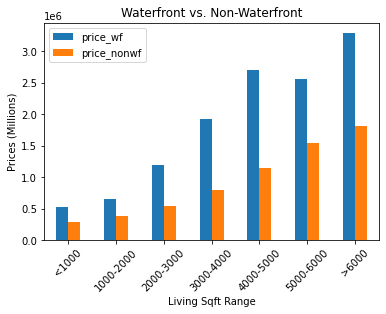

In [19]:
pandas_bar=wfnon_df
pandas_bar.plot(kind="bar",x="living_sqft_range", y=["price_wf","price_nonwf"],rot=45)

plt.xlabel("Living Sqft Range")
plt.ylabel("Prices (Millions)")
plt.title("Waterfront vs. Non-Waterfront")
plt.savefig('output_data/ waterfront vs nonwf price barchart.png')
plt.show()

Scatter plot with linear regression and r-squared value (waterfront bedrooms vs. price) 

The r-squared is: 0.5199270910829966


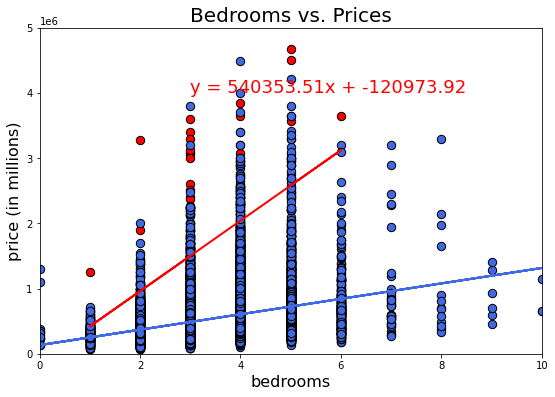

In [38]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = wf['bedrooms']
y_values = wf['price']

x = non_wf["bedrooms"]
y = non_wf["price"]

# Perform a linear regression 
# waterfront
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# non-waterfront
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x, y)
# Get regression values:
regress_values = x_values * slope + intercept
regress_values1 = x * slope1 + intercept1

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


# Create plot:
# waterfront
plt.scatter(x_values,y_values, marker='o', color='red', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'red', linewidth=2)
# non-waterfront
plt.scatter(x,y, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x,regress_values1,'royalblue', linewidth=2)

# Incorporate the other graph properties:
plt.title('Bedrooms vs. Prices', fontsize=20)
plt.ylabel('price (in millions)', fontsize=16, color='black')
plt.ylim([0,5000000])
plt.xlim([0,10])
plt.xlabel('bedrooms', fontsize=16, color='black')
plt.annotate(line_eq,(3,4000000), fontsize=18, color='red')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
# plt.savefig('output_data/Bedrooms vs. Prices.png')

# Show plot:
plt.show()

Boxplot (waterfront & price)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

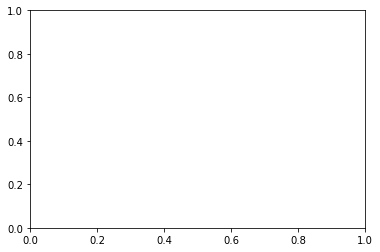

In [42]:
view_df=wf[["price"]]
nonview_df=non_wf[["price"]]
data1 = view_df
data2 = nonview_df
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

bp1 = plt.boxplot([data1, data2], flierprops=flierprops)
# bp2 = plt.boxplot(data2, flierprops=flierprops )

# view_df.boxplot(flierprops=flierprops)
# nonview_df.boxplot(flierprops=flierprops)

plt.ylabel("Price (in Millions)")


plt.xticks([1,2],['waterfront','non-waterfront'])
plt.ylim([0,5000000])
# plt.savefig('output_data/ Waterfront vs. Price boxplot.png')
plt.show()

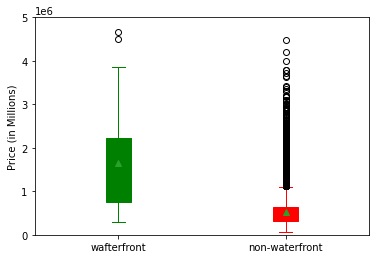

In [32]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=True, positions=pos)
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=color)
        
view_df=wf[["price"]]
nonview_df=non_wf[["price"]]

data1 = view_df
data2 = nonview_df
fig, ax = plt.subplots()
bp1 = color_boxplot(data1, 'green', [1])
bp2 = color_boxplot(data2, 'red', [2])
ax.autoscale()
ax.set(xticks=[1,2], xticklabels=["wafterfront","non-waterfront"])
plt.ylabel("Price (in Millions)")
plt.ylim([0,5000000])
plt.show()

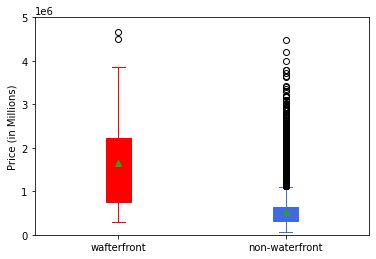

In [43]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=True, positions=pos)
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=color)
        
view_df=wf[["price"]]
nonview_df=non_wf[["price"]]

data1 = view_df
data2 = nonview_df
fig, ax = plt.subplots()
bp1 = color_boxplot(data1, 'red', [1])
bp2 = color_boxplot(data2, 'royalblue', [2])
ax.autoscale()
ax.set(xticks=[1,2], xticklabels=["wafterfront","non-waterfront"])
plt.ylabel("Price (in Millions)")
plt.ylim([0,5000000])
plt.show()

# 5. Do newly built homes cost more than older built homes and where/ which zipcodes are the majority of the newly built homes located at?

Scatter plot with linear regression and r-squared value (yr_built vs. price) 

Dataframe for top 6 most newly built houses include lat, lng, House ID, Price, and yr_built columns

Plot markers for the top 6 most newly built houses using lat and lng on a map with pins containing House ID, Price, and yr_built